In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics
from sklearn.metrics import precision_recall_curve

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
NCAA = pd.read_csv('/content/gdrive/MyDrive/Capstone_Original_Dataset.csv')

In [ ]:
#Removing games where the Home or Away team has 0 values for Home or Away stats
NCAA = NCAA.loc[(NCAA[['Home_Points_Home', 'Home_Points_Away','Away_Points_Home', 'Away_Points_Away']] != 0).all(axis=1)]

In [ ]:
NCAA

,Home_Team,Away_Team,Home_TurnAst_Last3,Home_TurnAst_Home,Home_TurnAst_Away,Home_Pts_Last3,Home_Points_Home,Home_Points_Away,Home_Avg_Scoring_Margin_Last3,Home_Avg_Scoring_Margin_Home,...,Away_Opp_Eff_Poss_Last3,Away_Opp_Eff_Poss_Home,Away_Opp_Eff_Poss_Away,Away_Team_Luck,Away_Team_SOS,Away_Team_Consis,Away_Team_First_Half_Rating,Away_Team_Second_Half_Rating,Away_Team_Last5,Home_Win/Lose_Pt
0,San Jose St.,South Dakota,0.745,1.304,0.549,62.0,76.5,57.7,-11.3,1.5,...,0.917,0.882,0.920,0.7,-5.1,12.3,1.3,-7.2,-5.1,9
1,San Diego St.,Long Beach St.,0.971,0.775,1.034,61.3,66.3,58.7,2.7,7.0,...,0.933,0.949,0.936,0.7,-3.1,13.3,-8.1,-0.9,-9.6,25
2,Nevada,Pepperdine,1.024,2.000,1.119,81.3,79.5,77.6,3.7,4.0,...,0.936,0.887,0.971,-0.7,0.2,7.4,0.0,-7.5,-7.0,13
3,Ohio St.,Duke,0.951,1.667,0.951,70.7,80.0,70.7,-2.0,14.0,...,0.893,0.886,0.961,1.2,9.7,8.9,9.4,12.7,21.9,5
4,Boise St.,Saint Louis,1.024,0.739,1.174,60.3,57.5,63.3,7.7,6.5,...,0.893,0.848,0.859,0.2,4.0,10.7,7.5,6.3,9.5,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,Coppin St.,Delaware St.,0.761,0.764,0.752,65.0,68.7,66.4,-15.3,-4.9,...,1.017,0.945,0.999,-3.1,-11.1,11.7,-10.5,-9.2,-13.0,13
3722,Hofstra,Charleston,1.652,1.935,1.206,71.3,78.2,75.3,-2.3,3.4,...,0.916,0.905,0.904,0.7,-0.3,9.5,1.4,-0.5,1.8,5
3723,Fordham,Massachusetts,0.587,1.084,0.744,51.7,67.9,64.1,-4.0,3.9,...,0.909,0.927,0.950,0.4,1.5,10.5,-3.7,2.4,-3.7,12
3724,North Carolina,Syracuse,0.864,1.331,1.046,73.0,77.6,77.9,8.3,11.9,...,1.028,0.937,1.002,-1.0,7.4,10.8,5.8,2.9,3.8,9


(array([  35.,  196.,  814., 1342.,  850.,  217.,   83.,   32.,    0.,
           4.]),
 array([ 8.9 , 11.37, 13.84, 16.31, 18.78, 21.25, 23.72, 26.19, 28.66,
        31.13, 33.6 ]),
 <a list of 10 Patch objects>)

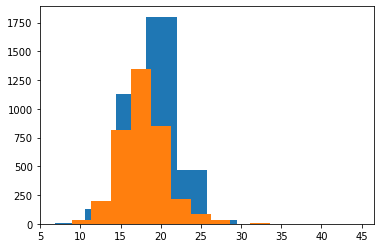

In [ ]:
turnovers = np.array(NCAA['Away_Turn_PerPoss_Away'])
plt.hist(turnovers)

turnovers = np.array(NCAA['Away_Turn_PerPoss_Home'])
plt.hist(turnovers)

(array([   6.,   47.,  378., 1155., 1361.,  464.,  121.,   32.,    3.,
           6.]),
 array([ 6.5 ,  9.21, 11.92, 14.63, 17.34, 20.05, 22.76, 25.47, 28.18,
        30.89, 33.6 ]),
 <a list of 10 Patch objects>)

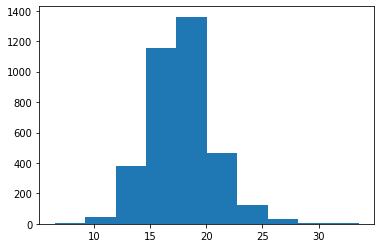

In [ ]:
floor = np.array(NCAA['Away_FloorPercent_Away'])
plt.hist(turnovers)



(array([   6.,   47.,  378., 1155., 1361.,  464.,  121.,   32.,    3.,
           6.]),
 array([ 6.5 ,  9.21, 11.92, 14.63, 17.34, 20.05, 22.76, 25.47, 28.18,
        30.89, 33.6 ]),
 <a list of 10 Patch objects>)

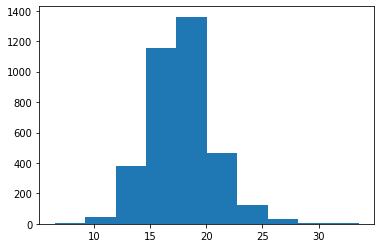

In [ ]:

floor = np.array(NCAA['Home_FloorPercent_Home'])
plt.hist(turnovers)

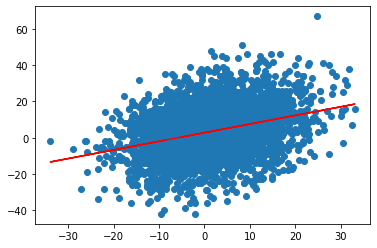

In [ ]:
x = np.array(NCAA['Home_Team_Last5'])
y = np.array(NCAA['Home_Win/Lose_Pt'])
a, b = np.polyfit(x, y, 1)
#add points to plot
plt.scatter(x, y)
#add line of best fit to plot
plt.plot(x, a*x+b, color='red')

In [ ]:
NCAA['Home_Turn_PerPoss_Home']

0       17.0
1       19.2
2       14.0
3       15.7
4       17.6
        ... 
3721    19.5
3722    11.7
3723    18.2
3724    16.1
3725    17.3
Name: Home_Turn_PerPoss_Home, Length: 3573, dtype: float64

In [ ]:
#Home Team win/loss percentage
HomeWins = NCAA[NCAA['Home_Win/Lose_Pt'] > 0]
HomeWins1 = HomeWins.count()[0]
HomeWinPercent = round((HomeWins1 / 3573) * 100, 1)
print('The Home Team won',HomeWinPercent, 'percent of the time in the games collected.')

The Home Team won 60.1 percent of the time in the games collected.


In [ ]:
NCAA.describe()

,Home_TurnAst_Last3,Home_TurnAst_Home,Home_TurnAst_Away,Home_Pts_Last3,Home_Points_Home,Home_Points_Away,Home_Avg_Scoring_Margin_Last3,Home_Avg_Scoring_Margin_Home,Home_Avg_Scoring_Margin_Away,Home_OffEff_Last3,...,Away_Opp_Eff_Poss_Last3,Away_Opp_Eff_Poss_Home,Away_Opp_Eff_Poss_Away,Away_Team_Luck,Away_Team_SOS,Away_Team_Consis,Away_Team_First_Half_Rating,Away_Team_Second_Half_Rating,Away_Team_Last5,Home_Win/Lose_Pt
count,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,...,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000
mean,1.065482,1.146053,0.916338,69.991548,73.269549,67.727484,0.115561,6.644472,-4.503219,1.000539,...,0.937294,0.923046,0.944451,0.002771,-0.180213,10.099636,0.423286,0.260593,0.512734,3.499860
std,0.344483,0.317500,0.225095,7.645490,7.506741,6.307165,9.609085,9.505271,7.753810,0.094128,...,0.047033,0.041390,0.034991,1.385140,5.455612,1.795700,5.108504,4.645670,9.671621,13.623386
min,0.333000,0.280000,0.261000,41.000000,40.000000,44.000000,-41.000000,-28.500000,-33.700000,0.656000,...,0.760000,0.646000,0.739000,-4.600000,-12.800000,2.000000,-13.300000,-16.000000,-32.800000,-42.000000
25%,0.813000,0.935000,0.754000,64.700000,68.600000,63.800000,-6.000000,0.300000,-9.600000,0.940000,...,0.906000,0.900000,0.921000,-0.900000,-4.200000,9.000000,-3.100000,-2.800000,-6.600000,-6.000000
50%,1.022000,1.111000,0.881000,69.700000,73.000000,67.600000,0.300000,6.400000,-4.000000,1.000000,...,0.937000,0.925000,0.945000,-0.100000,-1.700000,10.200000,0.000000,0.200000,0.000000,4.000000
75%,1.250000,1.321000,1.043000,75.000000,78.000000,71.900000,6.300000,12.300000,0.700000,1.062000,...,0.970000,0.949000,0.967000,0.900000,4.200000,11.200000,3.800000,3.400000,7.400000,12.000000
max,3.125000,3.071000,2.000000,114.000000,104.000000,110.000000,36.700000,45.300000,35.000000,1.341000,...,1.104000,1.124000,1.081000,5.800000,12.500000,16.800000,18.400000,14.700000,33.800000,67.000000


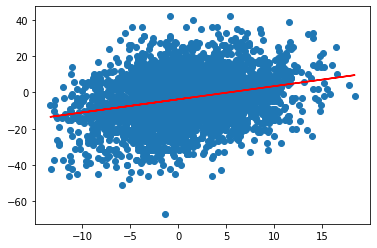

In [ ]:
x = np.array(NCAA['Away_Team_First_Half_Rating'])
y = np.array(NCAA['Home_Win/Lose_Pt']*-1)
a, b = np.polyfit(x, y, 1)
#add points to plot
plt.scatter(x, y)
#add line of best fit to plot
plt.plot(x, a*x+b, color='red')

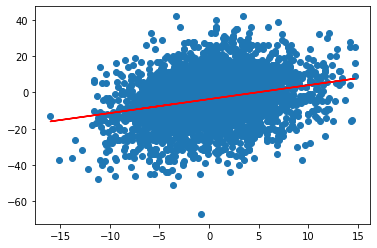

In [ ]:
x = np.array(NCAA['Away_Team_Second_Half_Rating'])
y = np.array(NCAA['Home_Win/Lose_Pt']*-1)
a, b = np.polyfit(x, y, 1)
#add points to plot
plt.scatter(x, y)
#add line of best fit to plot
plt.plot(x, a*x+b, color='red')

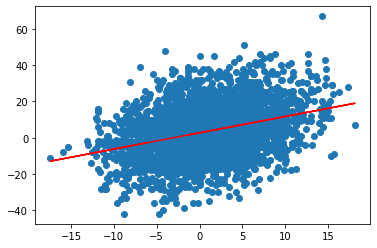

In [ ]:
x = np.array(NCAA['Home_Team_First_Half_Rating'])
y = np.array(NCAA['Home_Win/Lose_Pt'])
a, b = np.polyfit(x, y, 1)
#add points to plot
plt.scatter(x, y)
#add line of best fit to plot
plt.plot(x, a*x+b, color='red')

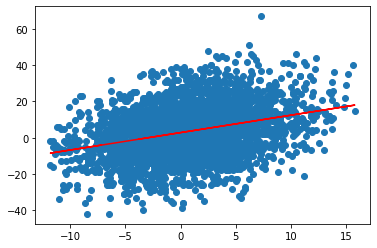

In [ ]:
x = np.array(NCAA['Home_Team_Second_Half_Rating'])
y = np.array(NCAA['Home_Win/Lose_Pt'])
a, b = np.polyfit(x, y, 1)
#add points to plot
plt.scatter(x, y)
#add line of best fit to plot
plt.plot(x, a*x+b, color='red')

In [ ]:
X = NCAA.drop(['Home_Team','Away_Team','Home_Win/Lose_Pt'], axis=1)
X = X.to_numpy()
y = NCAA[['Home_Win/Lose_Pt']]
y = y.to_numpy()
y = y.ravel()
scale = StandardScaler()

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

#Scale Data
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
print('LR')
print(r2_score(y_test,pred))


LR
0.2990369643949782


In [ ]:
for i in NCAA.columns:
  print(i)

Home_Team
Away_Team
Home_TurnAst_Last3
Home_TurnAst_Home
Home_TurnAst_Away
Home_Pts_Last3
Home_Points_Home
Home_Points_Away
Home_Avg_Scoring_Margin_Last3
Home_Avg_Scoring_Margin_Home
Home_Avg_Scoring_Margin_Away
Home_OffEff_Last3
Home_OffEff_Home
Home_OffEff_Away
Home_FloorPercent_Last3
Home_FloorPercent_Home
Home_FloorPercent_Away
Home_TrueShooting_Last3
Home_TrueShooting_Home
Home_TrueShooting_Away
Home_EffFGPct_Last3
Home_EffFGPct_Home
Home_EffFGPct_Away
Home_FTpct_Last3
Home_FTpct_Home
Home_FTpct_Away
Home_FT_Rate_Last3
Home_FT_Rate_Home
Home_FT_Rate_Away
Home_Three_Pt_Rate_Last3
Home_Three_Pt_Rate_Home
Home_Three_Pt_Rate_Away
Home_Off_RB_Pct_Last3
Home_Off_RB_Pct_Home
Home_Off_RB_Pct_Away
Home_Def_RB_Pct_Last3
Home_Def_RB_Pct_Home
Home_Def_RB_Pct_Away
Home_Block_Pct_Last3
Home_Block_Pct_Home
Home_Block_Pct_Away
Home_Steals_PerPoss_Last3
Home_Steals_PerPoss_Home
Home_Steals_PerPoss_Away
Home_Turn_PerPoss_Last3
Home_Turn_PerPoss_Home
Home_Turn_PerPoss_Away
Home_Ast_PerPoss_Last3
Hom

In [ ]:
X = NCAA[['Home_Fouls_PerPoss_Home','Home_Block_Pct_Home','Home_Steals_PerPoss_Home','Home_TurnAst_Home', 'Home_FloorPercent_Home', 'Home_Three_Pt_Rate_Home',
          'Home_FTpct_Home','Home_FT_Rate_Home', 'Home_Off_RB_Pct_Home',
          'Home_Def_RB_Pct_Home','Home_Team_SOS', 'Home_Team_Consis',
          'Home_Team_Last5','Home_Team_First_Half_Rating', 'Home_Team_Second_Half_Rating','Away_Fouls_PerPoss_Away','Away_Block_Pct_Away', 'Away_Steals_PerPoss_Away', 'Away_TurnAst_Away', 'Away_FloorPercent_Away',
          'Away_FTpct_Away','Away_FT_Rate_Away', 'Away_Off_RB_Pct_Away',
          'Away_Three_Pt_Rate_Away','Away_Def_RB_Pct_Away', 'Away_Team_SOS', 'Away_Team_Consis',
          'Away_Team_Last5', 'Away_Team_First_Half_Rating', 'Away_Team_Second_Half_Rating']]
X = X.to_numpy()
y = NCAA[['Home_Win/Lose_Pt']]
y = y.to_numpy()
y = y.ravel()
scale = StandardScaler()

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

#Scale Data
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
print('LR')
print(r2_score(y_test,pred))

LR
0.3480923843603997


In [ ]:
NCAA['Win/Lose'] = [1 if x > 0 else 0 for x in NCAA['Home_Win/Lose_Pt']]

In [ ]:
X = NCAA.drop(['Home_Win/Lose_Pt','Home_Team','Away_Team','Win/Lose'], axis=1)
X = X.to_numpy()
y = NCAA[['Win/Lose']]
y = y.to_numpy()
y = y.ravel()
scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
LR = LogisticRegression()
SV = SVC()

In [ ]:
LR1 = LR.fit(X_train,y_train)
y_pred = LR1.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7020979020979021

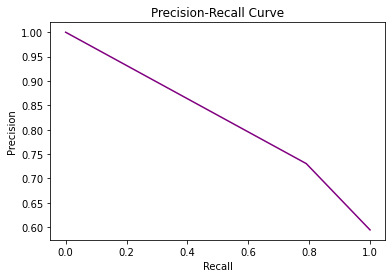

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
SVC = SV.fit(X_train,y_train)
y_pred = SVC.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7244755244755244

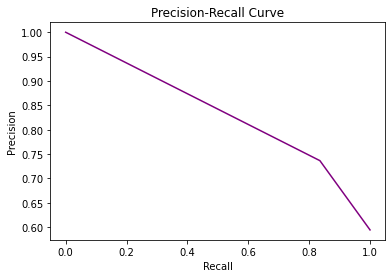

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
X = NCAA[['Home_Fouls_PerPoss_Home','Home_Block_Pct_Home','Home_Steals_PerPoss_Home','Home_TurnAst_Home', 'Home_FloorPercent_Home', 'Home_Three_Pt_Rate_Home',
          'Home_FTpct_Home','Home_FT_Rate_Home', 'Home_Off_RB_Pct_Home',
          'Home_Def_RB_Pct_Home','Home_Team_SOS', 'Home_Team_Consis',
          'Home_Team_Last5','Home_Team_First_Half_Rating', 'Home_Team_Second_Half_Rating','Away_Fouls_PerPoss_Away','Away_Block_Pct_Away', 'Away_Steals_PerPoss_Away', 'Away_TurnAst_Away', 'Away_FloorPercent_Away',
          'Away_FTpct_Away','Away_FT_Rate_Away', 'Away_Off_RB_Pct_Away',
          'Away_Three_Pt_Rate_Away','Away_Def_RB_Pct_Away', 'Away_Team_SOS', 'Away_Team_Consis',
          'Away_Team_Last5', 'Away_Team_First_Half_Rating', 'Away_Team_Second_Half_Rating']]
X = X.to_numpy()
y = NCAA[['Win/Lose']]
y = y.to_numpy()
y = y.ravel()
scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
LR1 = LR.fit(X_train,y_train)
y_pred = LR1.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7272727272727273

In [ ]:
SVC = SV.fit(X_train,y_train)
y_pred = SVC.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7272727272727273